In [1]:
!pip install html5lib
!pip install tqdm
!pip install pandas
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import html5lib
import time


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\Rismosch\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\Rismosch\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\Rismosch\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
url = "https://us.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/"
group_div = "block_competition_tables_group-wrapper"

my_agent = {"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15"}
response = requests.get(url, headers = my_agent)
soup = BeautifulSoup(response.text)

all_current = soup.find_all("div", {"class": group_div})

team_list = []

for div in all_current:
    
    tables = div.findChildren("table", recursive=True)
    table = tables[0]
    
    trs = table.findChildren("tr", recursive=True)

    for tr in trs:
        tds = tr.findChildren("td", recursive=True)
        for td in tds:
            classes = td.get("class")
            if 'large-link' in classes:
                team_name = td.findChildren("a")[0].contents[0]
                href = td.findChildren("a")[0]["href"]
                
                base_url = "https://us.soccerway.com"
                link = f'{base_url}{href}'
                
                team = {
                    "name": team_name,
                    "link": link,
                }
                
                team_list.append(team)
            
for team in team_list:
    print(f'{team["link"]} {len(team["link"])}')

# pandas truncates string longer than 50 characters by default
# but some of our links are longer than 50 characters
# we set the length to 2048, the max URL length
pd.options.display.max_colwidth = 2048
            
data_frame = pd.DataFrame(data=team_list)
print(data_frame)

https://us.soccerway.com/teams/netherlands/netherlands/1552/ 60
https://us.soccerway.com/teams/ecuador/ecuador/657/ 51
https://us.soccerway.com/teams/senegal/senegal/1941/ 52
https://us.soccerway.com/teams/qatar/qatar/1774/ 48
https://us.soccerway.com/teams/england/england/774/ 51
https://us.soccerway.com/teams/iran/iran/1178/ 46
https://us.soccerway.com/teams/united-states/united-states-of-america/2281/ 75
https://us.soccerway.com/teams/wales/wales/2332/ 48
https://us.soccerway.com/teams/saudi-arabia/saudi-arabia/1897/ 62
https://us.soccerway.com/teams/poland/poland/1677/ 50
https://us.soccerway.com/teams/mexico/mexico/1497/ 50
https://us.soccerway.com/teams/argentina/argentina/132/ 55
https://us.soccerway.com/teams/france/france/944/ 49
https://us.soccerway.com/teams/australia/australia/156/ 55
https://us.soccerway.com/teams/denmark/denmark/643/ 51
https://us.soccerway.com/teams/tunisia/tunisia/2211/ 52
https://us.soccerway.com/teams/spain/spain/2137/ 48
https://us.soccerway.com/team

In [3]:
def get_points_from_tr(tr):
    tds = tr.findChildren('td');
    result = tds[3]

    _as = result.findChildren('a')
    a = _as[0]

    result_classes = a.get("class")

    return calculate_points(result_classes)
    
    

def calculate_points(classes):
    # cancelled games wont have any classes.
    # we skip the point calculation in that
    # case, because the next line would throw
    # an "index out of range" error if we would
    # run it.
    print(classes)
    if not classes:
        return 0
        
    result_class = classes[0]

    if result_class == "result-win":
        return 3
    elif result_class == "result-draw":
        return 1
    
    return 0

point_list = []
woc_point_list = []

# calculate points for every team
for team in team_list:
    match_url = f'{team["link"]}matches/'

    print(match_url)

    # sleep to not overwhelm server
    time.sleep(1)
    
    response = requests.get(match_url, headers = my_agent)
    soup = BeautifulSoup(response.text)

    tables = soup.findAll("table", recursive=True)
    table = tables[0]

    tbody = table.findChildren('tbody')[0]
    trs = tbody.findChildren('tr');

    # find index of first WOC match
    index = 0;
    for tr in trs:
        tds = tr.findChildren('td')
        match_type_cell = tds[1]
        _as = match_type_cell.findChildren('a')
        _a = _as[0]
        match_type = _a.contents[0]

        if match_type == "WOC":
            break

        index += 1

    # get points of first WOC match
    woc_points = get_points_from_tr(trs[index])
    woc_point_list.append(woc_points)
    
    
    # find points of previous 5 matches
    amount = 5;
    index -= 1;
    indecies = range(index, index - amount, -1)

    points = 0
    for i in indecies:
        points += get_points_from_tr(trs[i])

    point_list.append(points);
        
data_frame['points_last_5_matches'] = point_list
data_frame['first_woc_points'] = woc_point_list

print(data_frame)

https://us.soccerway.com/teams/netherlands/netherlands/1552/matches/
['result-win']
['result-win']
['result-win']
['result-win']
['result-draw']
['result-win']
https://us.soccerway.com/teams/ecuador/ecuador/657/matches/
['result-win']
['result-draw']
['result-draw']
['result-draw']
['result-win']
['result-draw']
https://us.soccerway.com/teams/senegal/senegal/1941/matches/
['result-loss']
['result-draw']
['result-win']
['result-win']
['result-win']
['result-loss']
https://us.soccerway.com/teams/qatar/qatar/1774/matches/
['result-loss']
['result-win']
['result-win']
['result-win']
['result-win']
['result-draw']
https://us.soccerway.com/teams/england/england/774/matches/
['result-win']
['result-draw']
['result-loss']
['result-loss']
['result-draw']
['result-draw']
https://us.soccerway.com/teams/iran/iran/1178/matches/
['result-win']
['result-win']
['result-loss']
[]
['result-win']
['result-loss']
https://us.soccerway.com/teams/united-states/united-states-of-america/2281/matches/
['result-

In [4]:
url = "https://us.soccerway.com/teams/rankings/fifa/"

response = requests.get(url, headers = my_agent)
soup = BeautifulSoup(response.text)

all_current = soup.find_all("table")
table = all_current[0]
tbody = table.findChildren("tbody", recursive=True)[0]
trs = tbody.findChildren("tr")

rank_data_list = []
for tr in trs:
    tds = tr.findChildren("td");

    rank_td = tds[0]
    team_td = tds[1]
    points_td = tds[2]
    
    rank = int(rank_td.contents[0])
    
    team_a = team_td.findChildren("a")[0]
    team = team_a.contents[0]
    
    points = float(points_td.contents[0])
    
    rank_data = {
        "rank": rank,
        "team": team,
        "points": points
    }
    
    rank_data_list.append(rank_data)

# counter = 0
# for rank_data in rank_data_list:
#     print(f'{counter} {rank_data}')
#     counter += 1

rank_list = []
points_list = []

for team in team_list:
    index = 0;
    for rank_data in rank_data_list:
        if team["name"] == rank_data["team"]:
            break
        
        index += 1
    
    found_rank_data = rank_data_list[index] 
    rank = found_rank_data["rank"]
    points = found_rank_data["points"]
    
    rank_list.append(rank)
    points_list.append(points)
    
data_frame['rank'] = rank_list
data_frame['score'] = points_list

print(data_frame)

              name  \
0      Netherlands   
1          Ecuador   
2          Senegal   
3            Qatar   
4          England   
5             Iran   
6    United States   
7            Wales   
8     Saudi Arabia   
9           Poland   
10          Mexico   
11       Argentina   
12          France   
13       Australia   
14         Denmark   
15         Tunisia   
16           Spain   
17           Japan   
18         Germany   
19      Costa Rica   
20         Belgium   
21         Croatia   
22         Morocco   
23          Canada   
24          Brazil   
25     Switzerland   
26        Cameroon   
27          Serbia   
28        Portugal   
29  Korea Republic   
30         Uruguay   
31           Ghana   

                                                                           link  \
0                  https://us.soccerway.com/teams/netherlands/netherlands/1552/   
1                           https://us.soccerway.com/teams/ecuador/ecuador/657/   
2                       

In [5]:
from re import sub
from decimal import Decimal

value_data_list = []

for i in range(1,5):

    url = f'https://www.transfermarkt.us/vereins-statistik/wertvollstenationalmannschaften/marktwertetop?page={i}'
    response = requests.get(url, headers = my_agent)
    soup = BeautifulSoup(response.text)

    all_current = soup.find("div", {"id": "yw1"})

    tables = all_current.findChildren("table", recursive=False)
    table = tables[0]
    tbodies = table.findChildren("tbody", recursive=False)
    tbody = tbodies[0]

    trs = tbody.findChildren("tr", recursive=False)

    for tr in trs:
        tds = tr.findChildren("td", recursive=False)

        confederation_td = tds[2]
        market_value_td = tds[3]

        if len(confederation_td.contents) > 0:
            confederation = confederation_td.contents[0]
        else:
            confederation = "n/a"

        market_value_b = market_value_td.findChildren("b")[0]
        market_value_string = market_value_b.contents[0]

        # convert the money string into actual money value
        # source: https://stackoverflow.com/questions/8421922/how-do-i-convert-a-currency-string-to-a-floating-point-number-in-python/8422055#8422055
        market_value_converted = Decimal(sub(r'[^\d.]', '', market_value_string)) 

        market_value = float(market_value_converted)

        if market_value_string.endswith('bn'):
            market_value *= 1000

        _as = tr.findChildren("a", recursive=True)
        _a = _as[1]
        name = _a.contents[0]

        value_data = {
            "confederation": confederation,
            "team": name,
            "market_value": market_value
        }

        value_data_list.append(value_data)

confederation_list = []
market_value_list = []

for team in team_list:
    index = 0;
    for value_data in value_data_list:
        team_name = team["name"]
        
        # rename Korea, to match the two tables
        if team_name == "Korea Republic":
            team_name = "South Korea"
        
        if team_name == value_data["team"]:
            break
        
        index += 1
    
    
    found_value_data = value_data_list[index] 
    confederation = found_value_data["confederation"]
    market_value = found_value_data["market_value"]
    
    confederation_list.append(confederation)
    market_value_list.append(market_value)
    
data_frame['confederation'] = confederation_list
data_frame['market_value_in_million_euro'] = market_value_list

print(data_frame)

              name  \
0      Netherlands   
1          Ecuador   
2          Senegal   
3            Qatar   
4          England   
5             Iran   
6    United States   
7            Wales   
8     Saudi Arabia   
9           Poland   
10          Mexico   
11       Argentina   
12          France   
13       Australia   
14         Denmark   
15         Tunisia   
16           Spain   
17           Japan   
18         Germany   
19      Costa Rica   
20         Belgium   
21         Croatia   
22         Morocco   
23          Canada   
24          Brazil   
25     Switzerland   
26        Cameroon   
27          Serbia   
28        Portugal   
29  Korea Republic   
30         Uruguay   
31           Ghana   

                                                                           link  \
0                  https://us.soccerway.com/teams/netherlands/netherlands/1552/   
1                           https://us.soccerway.com/teams/ecuador/ecuador/657/   
2                       

In [6]:
data_frame.to_csv("C:/Users/Rismosch/test.csv", index=False)

In [17]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\Rismosch\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


{'whiskers': [<matplotlib.lines.Line2D at 0x2dd5c50c7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2dd5c50cd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dd5c50c550>,
 'medians': [<matplotlib.lines.Line2D at 0x2dd5c50d270>,
 'fliers': [<matplotlib.lines.Line2D at 0x2dd5c50d480>,
 'means': []}

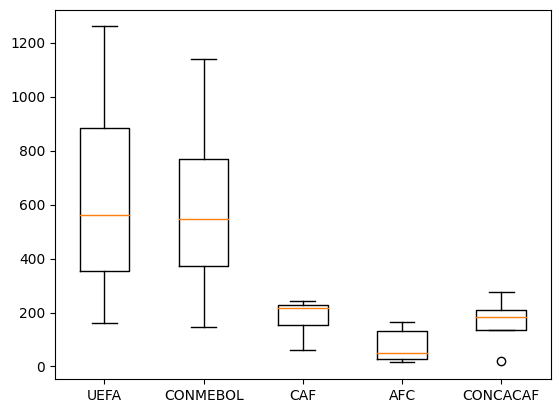

In [18]:
plot_dict = {}
for index, row in data_frame.iterrows():
    confederation = row['confederation']
    market_value = row['market_value_in_million_euro']
    
    if plot_dict.get(confederation) is None:
        plot_dict[confederation] = []
        
    plot_dict[confederation].append(market_value)

data = []
labels = []
for key in plot_dict:
    values = plot_dict[key]
    data.append(values)
    labels.append(key)

plt.boxplot(data, labels=labels)

UEFA [3, 3, 1, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3]
CONMEBOL [3, 0, 3, 1]
CAF [0, 1, 1, 0, 0]
AFC [0, 3, 3, 0, 3, 1]
CONCACAF [1, 1, 0, 0]


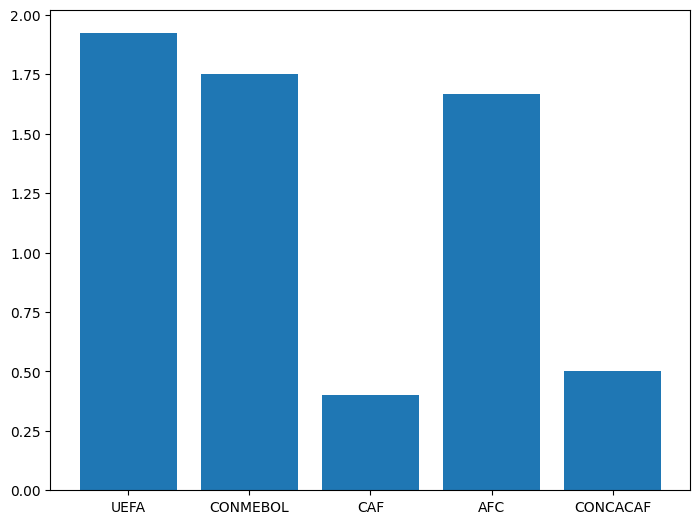

In [27]:
plot_dict = {}
for index, row in data_frame.iterrows():
    confederation = row['confederation']
    woc_points = row['first_woc_points']
    
    if plot_dict.get(confederation) is None:
        plot_dict[confederation] = []
        
    plot_dict[confederation].append(woc_points)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

data = []
labels = []
for key in plot_dict:
    values = plot_dict[key]
    average = sum(values) / len(values)
    
    data.append(average)
    labels.append(key)

ax.bar(labels,data)
plt.show()